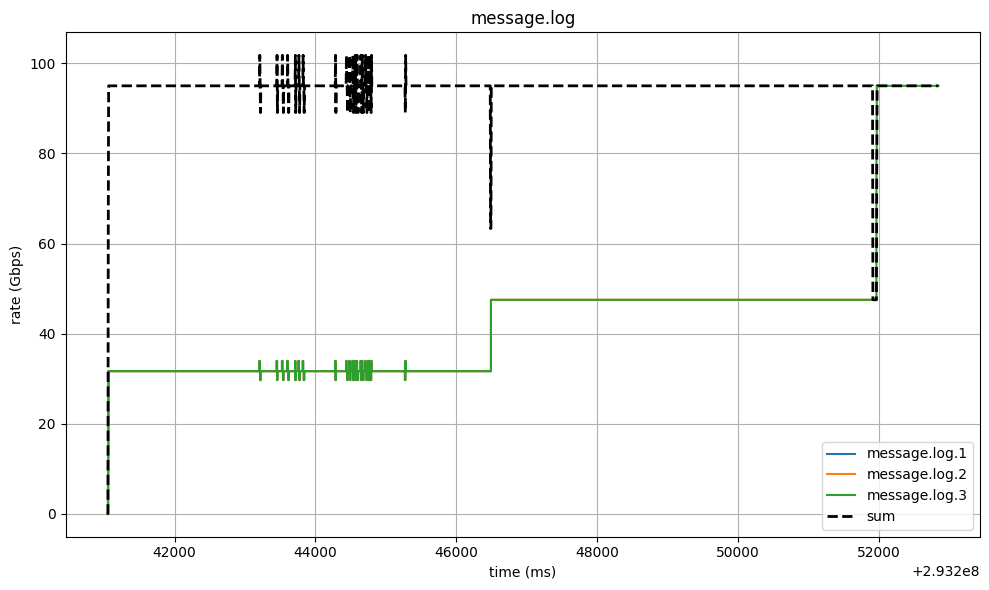

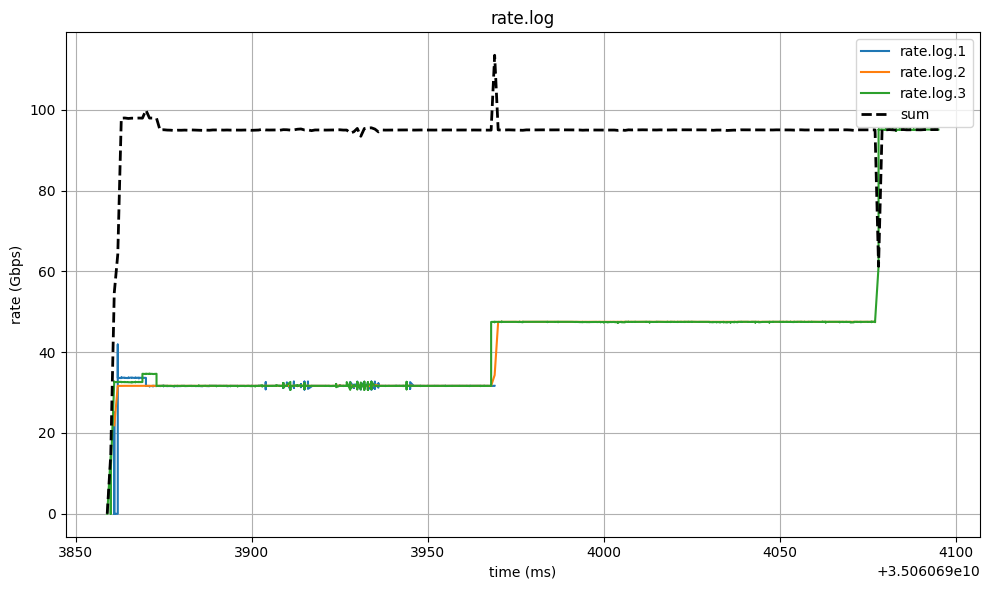

In [23]:
import matplotlib.pyplot as plt

def plot_message_logs(nums):
    plt.figure(figsize=(10, 6))
    all_times = []
    all_rates = []
    data_dict = {}

    # 读取所有文件数据
    for num in nums:
        times = []
        rates = []
        with open(f'message.log.{num}', 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 4:
                    continue
                try:
                    t = int(parts[0]) * 5  # 乘以5ms
                    r = float(parts[3])
                    times.append(t)
                    rates.append(r)
                except Exception:
                    continue
        plt.plot(times, rates, label=f'message.log.{num}')
        data_dict[num] = (times, rates)
        all_times.append(times)
        all_rates.append(rates)

    # 统一时间轴
    union_times = sorted(set().union(*all_times))
    sum_rates = []
    for t in union_times:
        s = 0
        for i in range(len(nums)):
            # 找到当前文件在该时间点的速率
            if t in all_times[i]:
                idx = all_times[i].index(t)
                s += all_rates[i][idx]
        sum_rates.append(s)
    plt.plot(union_times, sum_rates, label='sum', color='black', linewidth=2, linestyle='--')

    plt.xlabel('time (ms)')
    plt.ylabel('rate (Gbps)')
    plt.title('message.log')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_rate_logs(nums):
    plt.figure(figsize=(10, 6))
    all_times = []
    all_rates = []
    data_dict = {}

    for num in nums:
        times = []
        rates = []
        with open(f'rate.log.{num}', 'r') as f:
            for line in f:
                if ':' not in line or 'Gbps' not in line:
                    continue
                try:
                    t, rest = line.strip().split(':', 1)
                    t = int(t)
                    r = float(rest.replace('Gbps', '').strip())
                    times.append(t // 50)
                    rates.append(r)
                except Exception:
                    continue
        plt.plot(times, rates, label=f'rate.log.{num}')
        data_dict[num] = (times, rates)
        all_times.append(times)
        all_rates.append(rates)

    # 统一时间轴
    union_times = sorted(set().union(*all_times))
    sum_rates = []
    for t in union_times:
        s = 0
        for i in range(len(nums)):
            if t in all_times[i]:
                idx = all_times[i].index(t)
                s += all_rates[i][idx]
        sum_rates.append(s)
    plt.plot(union_times, sum_rates, label='sum', color='black', linewidth=2, linestyle='--')

    plt.xlabel('time (ms)')
    plt.ylabel('rate (Gbps)')
    plt.title('rate.log')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 调用
plot_message_logs([1, 2, 3])
plot_rate_logs([1, 2, 3])